In [74]:
# !wget https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2025/bn250702618/quicklook/glg_healpix_all_bn250702618.fit

import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits

# glg_healpix_all_bn250702618.fit
map_data = hp.read_map('bayestar.multiorder.fits', field=0, nest=False, verbose=True)
hp.mollview(map_data, unit='Probability', cmap='viridis')
hp.graticule()
plt.show()

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_75433/3323118569.py:8: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_data = hp.read_map('bayestar.multiorder.fits', field=0, nest=False, verbose=True)


FileNotFoundError: [Errno 2] No such file or directory: 'bayestar.multiorder.fits'

In [ ]:

import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits

filename1 = 'GRB 250702D.fit'
filename2 = 'GRB 250702B.fit'
filename3 = 'GRB 250702C.fit'
filename4 = 'GRB 250702E.fit'

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_75433/2266614741.py:1: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_data = hp.read_map(filename3, field=0, nest=False, verbose=True)


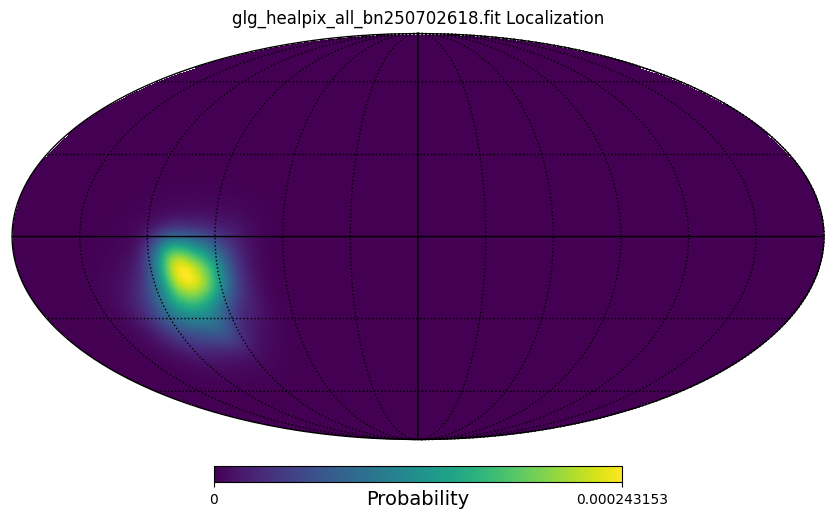

In [53]:
map_data = hp.read_map(filename3, field=0, nest=False, verbose=True)
hp.mollview(map_data, title=f'{filename3} Localization', unit='Probability', cmap='viridis')
hp.graticule()
plt.show()

In [49]:
map_data

array([3.6910142e-10, 3.6571177e-10, 3.6017256e-10, ..., 7.1750597e-09,
       6.4867343e-09, 6.2079568e-09], dtype=float32)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_75433/3394608410.py:17: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  m = hp.read_map(fname, field=0, nest=False, verbose=False)


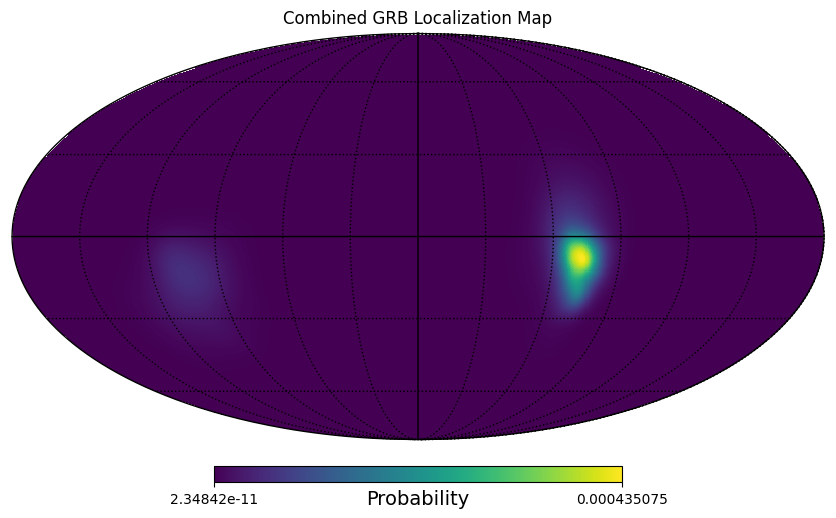

In [29]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# List of FITS files
filenames = [
    'GRB 250702D.fit',
    'GRB 250702B.fit',
    'GRB 250702C.fit',
    'GRB 250702E.fit',
]

# Read all maps and sum them
maps = []
for fname in filenames:
    # Most GRB/Fermi/LIGO maps are in extension 1 (binary table), but healpy can usually auto-detect.
    m = hp.read_map(fname, field=0, nest=False, verbose=False)
    maps.append(m)

# Combine: e.g., sum probabilities pixel-wise
combined_map = np.sum(maps, axis=0)
# Optionally, normalize so the sum is 1 (total probability)
combined_map /= np.sum(combined_map)

# Plot the combined skymap
hp.mollview(combined_map, title='Combined GRB Localization Map', unit='Probability', cmap='viridis')
hp.graticule()
plt.show()


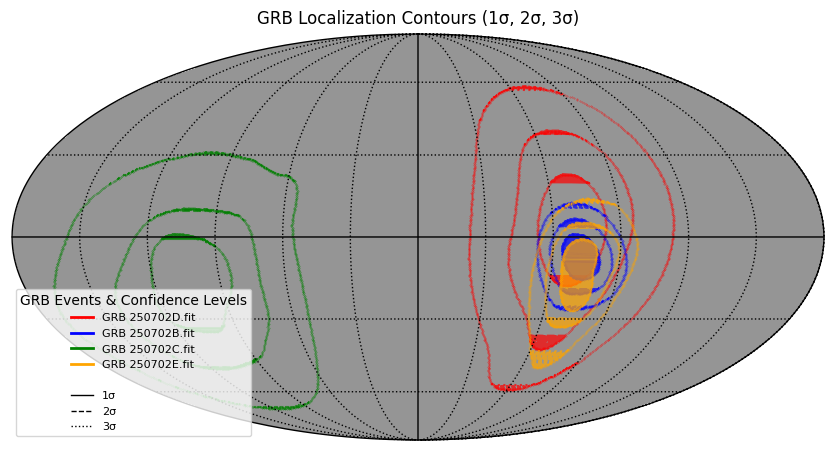

In [56]:
# Set up Mollweide projection (blank, just for contours)
hp.mollview(np.zeros_like(maps[0]), title='GRB Localization Contours (1σ, 2σ, 3σ)', unit='Probability', cmap='Greys', cbar=False)

# Define confidence levels for 1, 2, 3 sigma
confidence_levels = [0.6827, 0.9545, 0.9973]  # 68.27%, 95.45%, 99.73%
sigma_labels = ['1σ', '2σ', '3σ']
line_styles = ['-', '--', ':']

# Plot contours for each GRB
for i, (m, color, fname) in enumerate(zip(maps, colors, filenames)):
    # Normalize to sum to 1 (probability)
    prob = m / np.sum(m)
    
    # Plot contours for each confidence level
    for conf_level, sigma_label, line_style in zip(confidence_levels, sigma_labels, line_styles):
        # Compute threshold for confidence region
        idx = np.argsort(prob)[::-1]
        cumsum = np.cumsum(prob[idx])
        threshold = prob[idx][np.searchsorted(cumsum, conf_level)]
        
        # Create a binary mask for the confidence region
        mask = prob >= threshold
        
        # Get boundary pixels of the mask
        boundary_pixels = []
        nside = hp.npix2nside(len(prob))
        for pix in np.where(mask)[0]:
            neighbors = hp.get_all_neighbours(nside, pix)
            neighbors = neighbors[neighbors != -1]  # Remove invalid neighbors
            if not all(mask[neighbors]):  # If any neighbor is outside the region
                boundary_pixels.append(pix)
        
        # Plot boundary pixels as contour
        if boundary_pixels:
            theta_contour, phi_contour = hp.pix2ang(nside, boundary_pixels)
            label = f'{fname} {sigma_label}' if conf_level == confidence_levels[0] else None
            hp.projplot(theta_contour, phi_contour, 'o', markersize=0.3, color=color, 
                       linestyle=line_style, alpha=0.7, label=label)

# Create legend for files and sigma levels
from matplotlib.lines import Line2D
legend_elements = []

# Add legend for each file
for color, fname in zip(colors, filenames):
    legend_elements.append(Line2D([0], [0], color=color, lw=2, label=fname))

# Add separator
legend_elements.append(Line2D([0], [0], color='white', lw=0))

# Add legend for sigma levels
for sigma_label, line_style in zip(sigma_labels, line_styles):
    legend_elements.append(Line2D([0], [0], color='black', linestyle=line_style, 
                                 lw=1, label=sigma_label))

plt.legend(handles=legend_elements, loc='lower left', fontsize=8, 
           title='GRB Events & Confidence Levels')

hp.graticule()
plt.show()


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_75433/3689822424.py:16: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  maps = [hp.read_map(f, field=0, nest=False, verbose=False) for f in filenames]


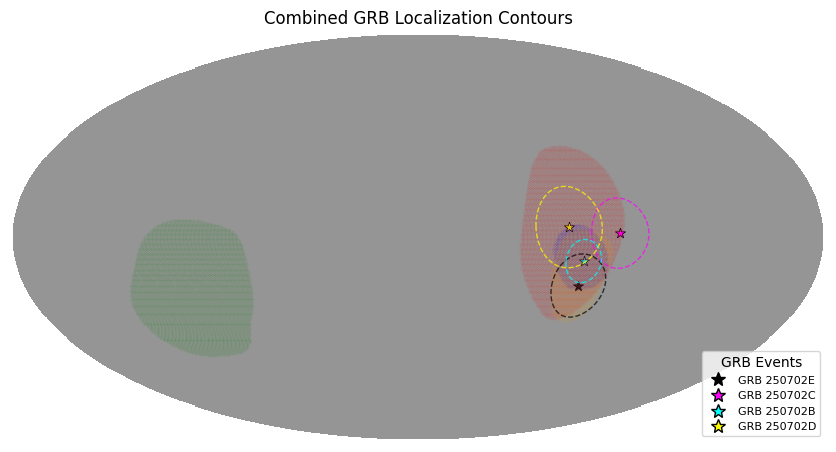

In [38]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Sky map and contour plotting (your existing code here)
# List of FITS files and contour colors
filenames = [
    'GRB 250702D.fit',
    'GRB 250702B.fit',
    'GRB 250702C.fit',
    'GRB 250702E.fit',
]
colors = ['red', 'blue', 'green', 'orange']

# Read maps
maps = [hp.read_map(f, field=0, nest=False, verbose=False) for f in filenames]

# Set up Mollweide projection (blank, just for contours)
hp.mollview(np.zeros_like(maps[0]), title='Combined GRB Localization Contours', unit='Probability', cmap='Greys', cbar=False)

# Plot 90% credible region contour for each GRB
for m, color, fname in zip(maps, colors, filenames):
    # Normalize to sum to 1 (probability)
    prob = m / np.sum(m)
    # Compute threshold for 90% confidence region
    idx = np.argsort(prob)[::-1]
    cumsum = np.cumsum(prob[idx])
    threshold = prob[idx][np.searchsorted(cumsum, 0.9)]
    # Create a binary mask for the 90% region
    mask = prob >= threshold
    # Convert pixel indices to theta, phi coordinates
    pixels = np.where(mask)[0]
    theta, phi = hp.pix2ang(hp.npix2nside(len(prob)), pixels)
    # Plot the contour using projplot
    hp.projplot(theta, phi, 'o', markersize=0.1, color=color, label=fname, alpha=0.3)

# GRB events to plot (RA in degrees, Dec in degrees, error radius in degrees)
events = [
    {'name': 'GRB 250702E', 'ra': 286.8, 'dec': -17.7, 'err': 11.6},
    {'name': 'GRB 250702C', 'ra': 270.3, 'dec':   1.4, 'err': 12.7},
    {'name': 'GRB 250702B', 'ra': 286.0, 'dec':  -8.7, 'err':  7.8},
    {'name': 'GRB 250702D', 'ra': 292.9, 'dec':   3.6, 'err': 14.7},
]

# Colors for the event markers
event_colors = ['black', 'magenta', 'cyan', 'yellow']

# Plot markers (stars) and error circles
for ev, col in zip(events, event_colors):
    # Convert RA/Dec to theta/phi for healpy (radians)
    ra_rad  = np.deg2rad(ev['ra'])
    dec_rad = np.deg2rad(ev['dec'])
    theta = 0.5 * np.pi - dec_rad  # theta = 90° - dec
    phi = ra_rad
    # Plot the marker (star)
    hp.projscatter(theta, phi, lonlat=False, s=60, c=col, marker='*', edgecolor='k', linewidth=0.5, label=ev['name'])
    # Draw error circle
    circle_ra = ev['ra']
    circle_dec = ev['dec']
    circle_radius = ev['err']  # degrees
    # Circle: draw many points around the circle
    angle = np.linspace(0, 2*np.pi, 200)
    circle_ra_arr = circle_ra + circle_radius * np.cos(angle) / np.cos(np.deg2rad(circle_dec))
    circle_dec_arr = circle_dec + circle_radius * np.sin(angle)
    circle_theta = np.deg2rad(90.0 - circle_dec_arr)
    circle_phi   = np.deg2rad(circle_ra_arr)
    hp.projplot(circle_theta, circle_phi, color=col, linestyle='--', linewidth=1.0, alpha=0.7)

# Optionally, add legend for GRB events
from matplotlib.lines import Line2D
legend_lines = [Line2D([0], [0], marker='*', color='w', markerfacecolor=c, markeredgecolor='k', lw=0, markersize=10) for c in event_colors]
plt.legend(legend_lines, [e['name'] for e in events], loc='lower right', fontsize=8, title='GRB Events')

plt.show()


In [58]:
(1435510301.125-1435508511.07)/60

29.83425000111262

In [60]:
(1435508511.07-1435507943.451)/60

9.460316665967305

In [61]:
(1435508511.07-1435507563.641)/60

15.790483331680297

In [62]:
(1435508511.07-1435507295.57)/60

20.258333333333333